# Laboratorium 1 - Operacje podstawowe, gradient, filtracja

W ramach laboratorium zostaną przedstawione podstawowe operacje na obrazach (wczytanie, normalizacja, wyznaczanie gradientu oraz filtracja).

Rozpocznijmy od wczytania przydatnych bibliotek:

In [ ]:
import numpy as np # Podstawowa biblioteka numeryczna
import matplotlib.pyplot as plt # Biblioteka do wizualizacji 2D
import scipy.signal as signal # Podstawowe funckcje przetwarzania sygnałów
import scipy.ndimage as nd # Podstawowe funkcje przetwarzania obrazów
from skimage import io
from skimage import color
%matplotlib inline

Wczytajmy, znormalizujmy i wyświetlmy przykładowy obraz:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


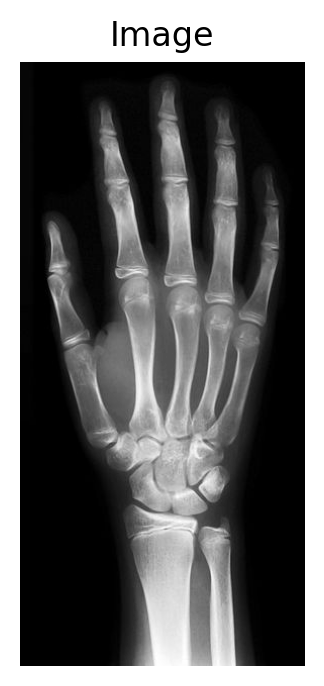

In [ ]:
image = io.imread("xray.jpg")
image = color.rgb2gray(image) # Konwersja do przestrzeni szarości
image = (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalizacja do zakresu [0-1]
plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.show()

W kolejnym kroku użyjmy gotowej funkcji do wyznaczania gradientu (jako dyskretnej aproksymacji funkcji R^2 -> R):

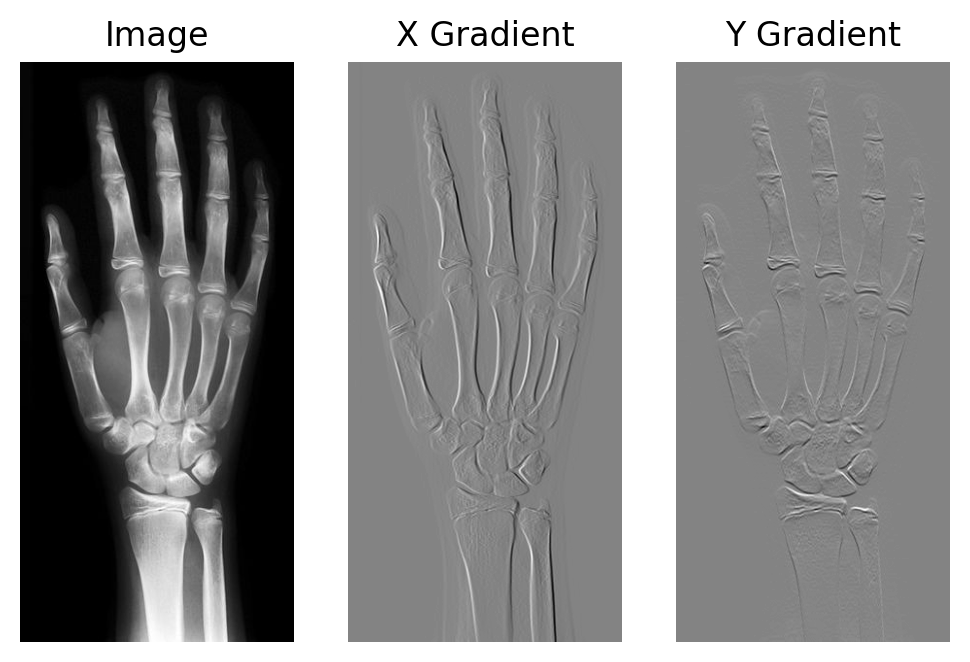

In [ ]:
y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(x_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(y_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()


W kolejnym kroku proszę zaimplementować własną funkcję do obliczenia gradientu (nie korzystając z gotowych funkcji gradientowych). Funkcja jako argument powinna przyjmować obraz oraz sposób obliczania gradientu (backward, central, forward). Do wartości brzegowych przypisz 0.

In [ ]:
def our_gradient(image, mode):

    x = np.zeros(image.shape)
    y = np.zeros(image.shape)

    if(mode == "backward"):
      for i in range(1,5):
        y[i] = image[i]-image[i-1]
        np.transpose(x)[i] = np.transpose(image)[i]- np.transpose(image)[i-1]

    if(mode == "central"):
      for i in range(1,4):
        y[i] = (image[i+1]-image[i-1])/2
        np.transpose(x)[i] = (np.transpose(image)[i+1]- np.transpose(image)[i-1])/2

    if(mode == "forward"):
      for i in range(4):
        y[i] = image[i+1]-image[i]
        np.transpose(x)[i] = np.transpose(image)[i+1]- np.transpose(image)[i]

    return y, x

np.random.seed(123)
rand_image = np.random.randn(5, 5)
y_numpy, x_numpy = np.gradient(rand_image)
y_forward, x_forward = our_gradient(rand_image, "forward")
y_central, x_central = our_gradient(rand_image, "central")
y_backward, x_backward = our_gradient(rand_image, "backward")

print(rand_image)

print("/nY_numpy, X_numpy: ")
print(y_numpy)
print(x_numpy)

print("/nY_forward, X_forward: ")
print(y_forward)
print(x_forward)

print("/nY_central, X_central: ")
print(y_central)
print(x_central)

print("/nY_backward, X_backward: ")
print(y_backward)
print(x_backward)




[[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
 [ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897  1.49138963 -0.638902   -0.44398196]
 [-0.43435128  2.20593008  2.18678609  1.0040539   0.3861864 ]
 [ 0.73736858  1.49073203 -0.93583387  1.17582904 -1.25388067]]
/nY_numpy, X_numpy: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.20337223 -0.54602721  0.60420556  0.43369636  0.06730915]
 [-1.04289391  2.31630466  1.30784936 -0.13094118  0.6264634 ]
 [ 0.70812736  0.7927205  -1.21361175  0.90736552 -0.40494935]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]]
[[ 2.08297605  0.68430455 -1.25182008 -0.43078938  0.92769446]
 [-4.07811578 -1.04017458  1.84630775 -0.21891389 -2.13267666]
 [ 0.58417718  1.08513789 -0.27209651 -0.96768579  0.19492004]
 [ 2.64028136  1.31056868 -0.60093809 -0.90029984 -0.6178675 ]
 [ 0.75336345 -0.83660122 -0.15745149 -0.1590234  -2.42970971]]
/nY_forward, X_forward: 
[[ 2.7

Przykładowy wynik działania funkcji:

In [ ]:
np.random.seed(123)
rand_image = np.random.randn(5, 5)
y_numpy, x_numpy = np.gradient(rand_image)
y_forward, x_forward = our_gradient(rand_image, "forward")
y_central, x_central = our_gradient(rand_image, "central")
y_backward, x_backward = our_gradient(rand_image, "backward")

print("Y_numpy, X_numpy: ")
print(y_numpy)
print(x_numpy)

print("Y_forward, X_forward: ")
print(y_forward)
print(x_forward)

print("Y_central, X_central: ")
print(y_central)
print(x_central)

print("Y_backward, X_backward: ")
print(y_backward)
print(x_backward)

Y_numpy, X_numpy: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.20337223 -0.54602721  0.60420556  0.43369636  0.06730915]
 [-1.04289391  2.31630466  1.30784936 -0.13094118  0.6264634 ]
 [ 0.70812736  0.7927205  -1.21361175  0.90736552 -0.40494935]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]]
[[ 2.08297605  0.68430455 -1.25182008 -0.43078938  0.92769446]
 [-4.07811578 -1.04017458  1.84630775 -0.21891389 -2.13267666]
 [ 0.58417718  1.08513789 -0.27209651 -0.96768579  0.19492004]
 [ 2.64028136  1.31056868 -0.60093809 -0.90029984 -0.6178675 ]
 [ 0.75336345 -0.83660122 -0.15745149 -0.1590234  -2.42970971]]
Y_forward, X_forward: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [-2.33032269  2.33197027  1.92030225 -1.90483826  0.42275844]
 [ 0.24453488  2.30063905  0.69539646  1.64295589  0.83016836]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.08297

W jaki sposób funckcja gradient w bibliotece numpy traktuje przypadki brzegowe?

Następnie zaimplementuj przybliżenie gradientu za pomocą filtrów Sobela i Prewitta (zwróć uwagę na różnice między konwolucją, a korelacją). Możesz użyć gotowych funkcji do konwolucji/korelacji.

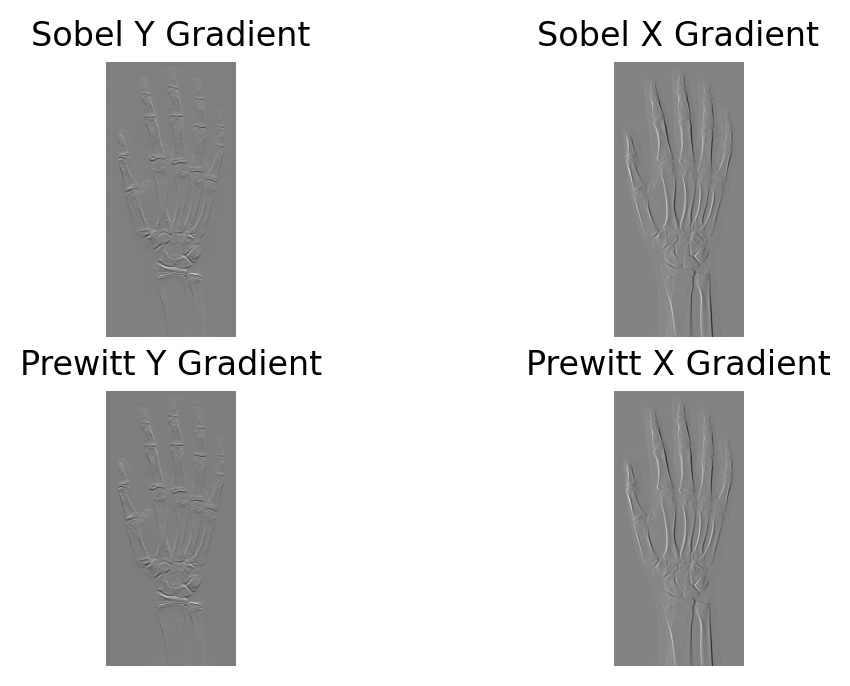

In [ ]:
Sx = np.array([[1, 0,-1],
               [2, 0,-2],
               [1, 0,-1]])

Sy = np.array([[1, 2, 1] ,
               [0, 0, 0], 
               [-1,-2,-1]])

Px = np.array([[1, 0,-1],
               [1, 0,-1],
               [1, 0,-1]])

Py = np.array([[1, 1, 1] ,
               [0, 0, 0], 
               [-1,-1,-1]])

def sobel_gradient(image):
    y = nd.convolve(image, Sy)
    x = nd.convolve(image, Sx)
    return y, x

def prewitt_gradient(image):
    y = nd.convolve(image, Py)
    x = nd.convolve(image, Px)
    return y, x

sobel_y_gradient, sobel_x_gradient = sobel_gradient(image)
prewitt_y_gradient, prewitt_x_gradient = prewitt_gradient(image)

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)

plt.subplot(2, 2, 1)
plt.imshow(sobel_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel Y Gradient")

plt.subplot(2, 2, 2)
plt.imshow(sobel_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel X Gradient")

plt.subplot(2, 2, 3)
plt.imshow(prewitt_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y Gradient")

plt.subplot(2, 2, 4)
plt.imshow(prewitt_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt X Gradient")
plt.show()

Przykładowy wynik działania funkcji:

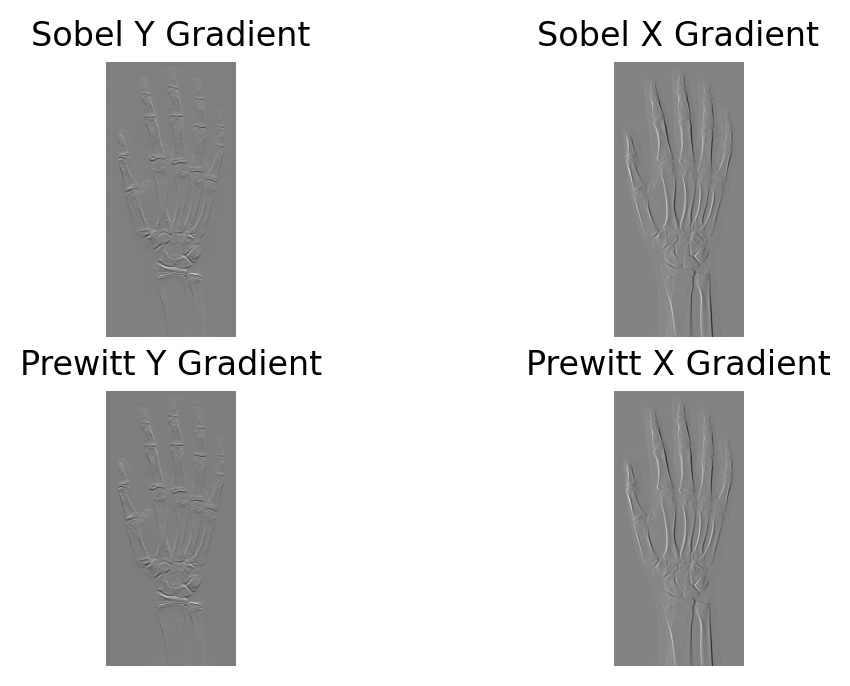

In [ ]:
sobel_y_gradient, sobel_x_gradient = sobel_gradient(image)
prewitt_y_gradient, prewitt_x_gradient = prewitt_gradient(image)

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)

plt.subplot(2, 2, 1)
plt.imshow(sobel_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel Y Gradient")

plt.subplot(2, 2, 2)
plt.imshow(sobel_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel X Gradient")

plt.subplot(2, 2, 3)
plt.imshow(prewitt_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y Gradient")

plt.subplot(2, 2, 4)
plt.imshow(prewitt_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt X Gradient")
plt.show()

W kolejnym kroku wyznacz magnitudę oraz kąt gradientu:

In [1]:
def gradient_magnitude(x_gradient, y_gradient):
    return np.sqrt(x_gradient**2 + y_gradient**2)

def gradient_angle(x_gradient, y_gradient):
    return np.arctan2(y_gradient, x_gradient)

Przykładowy wynik działania funkcji poniżej. Czy taki sposób wizualizacji kąta gradientu jest poprawny i informacyjny? Uzasadnij. Co przedstawia magnituda, a co kąt gradientu?

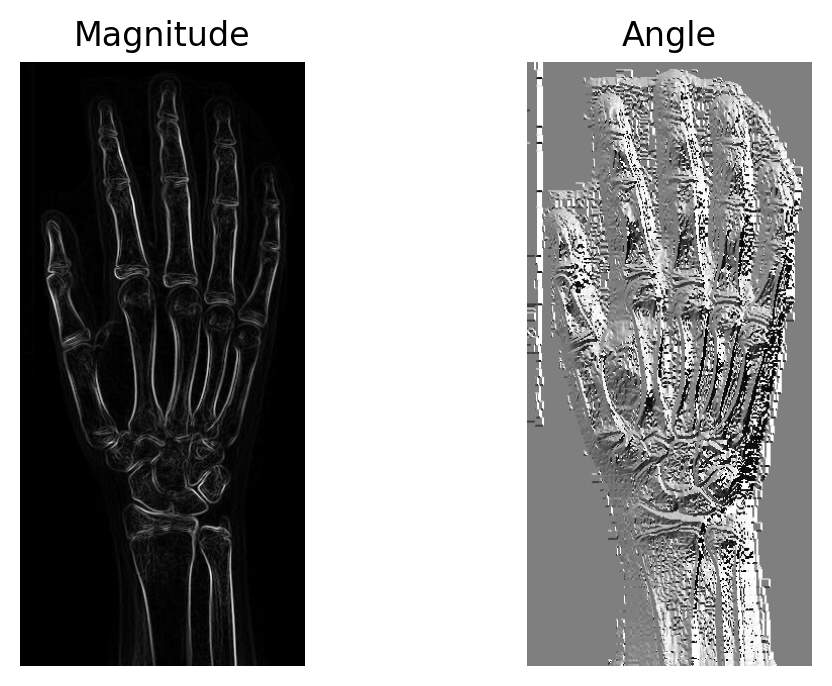

In [ ]:
mag, angle = gradient_magnitude(x_gradient, y_gradient), gradient_angle(x_gradient, y_gradient)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.title("Magnitude")
plt.subplot(1, 2, 2)
plt.imshow(angle, cmap='gray')
plt.axis('off')
plt.title("Angle")
plt.show()

W kolejnym zadaniu dokonaj filtracji obrazu filtrem uśredniającym (średnią arytmetyczną, średnią ważoną filtrem Gaussa oraz filtrem medianowym). Możesz użyć gotowych funkcji do filtracji/korelacji/konwolucji ale nie używaj gotowej funkcji filtru medianowego.

In [ ]:
from scipy import ndimage

def uniform_filter(image, filter_size=(3, 3)):
    return ndimage.uniform_filter(image, size=filter_size)

def gaussian_filter(image, sigma):
    return ndimage.gaussian_filter(image, sigma=sigma)

def median_filter(image, filter_size=(3, 3)):
    m_filter = np.zeros(image.shape)

    for i in range(len(image)):
        for j in range(len(image[0]) - filter_size[0]):
            m_filter[i][j] = np.median(image[i:filter_size[0]+i, j:filter_size[1]+j])
    return m_filter


Przykładowy wynik został pokazany poniżej. Wytłumacz różnicę między filtrem uśredniającym średnią arytmetyczną oraz filtrem Gaussa. Która filtracja jest bardziej pożądana? Dlaczego? Po co dokonujemy uśredniania? Przypomnij sobie informacje dotyczące widma i wpływu filtracji z teorii sygnałów. Jakie są zalety i wady filtracji medianowej? Filtracja medianowa jest operacją liniową czy nieliniową?

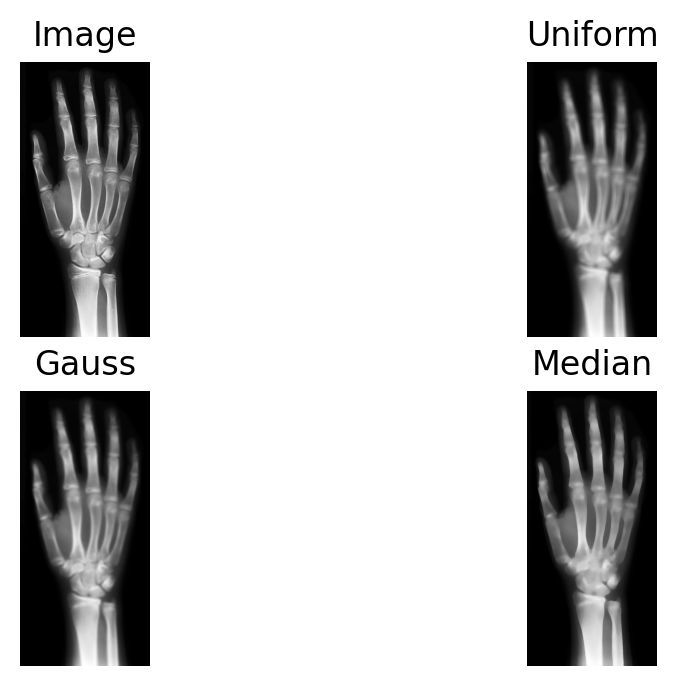

In [ ]:
uni_image = uniform_filter(image, (9, 9))
gauss_image = gaussian_filter(image, 2)
median_image = median_filter(image, (9, 9))
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(2, 2, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.title("Uniform")
plt.subplot(2, 2, 3)
plt.imshow(gauss_image, cmap='gray')
plt.axis('off')
plt.title("Gauss")
plt.subplot(2, 2, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.title("Median")
plt.show()

W ostatnim kroku zaimplementuj funkcję do wyznaczania Laplasjanu (możesz użyć gotowych funkcji do korelacji/konwolucji).

In [ ]:
from scipy import signal

def laplacian(image):
    kernel = [[0, -1, 0], 
              [-1, 4, -1], 
              [0, -1, 0]]
              
    return signal.convolve2d(image, kernel)

Przykładowy wynik został pokazany poniżej. Co przedstawa Laplasjan? Do czego może być wykorzystywany?

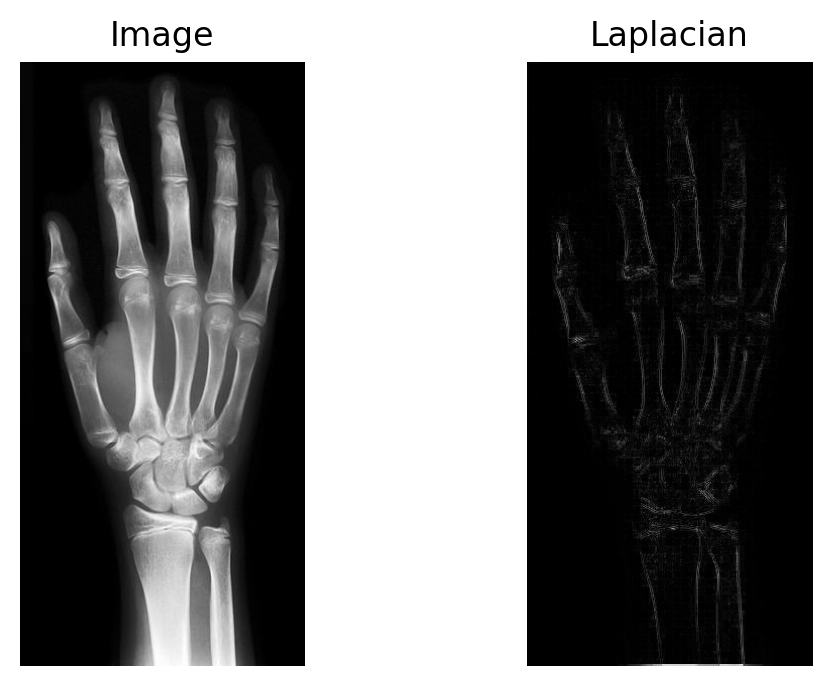

In [ ]:
laplacian_image = laplacian(image)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.title("Laplacian")
plt.show()